In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras. models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow. keras.layers import Dropout, Flatten

In [2]:
mnist = tf.keras. datasets .mnist

In [3]:
(x_train, y_train) , (x_test, y_test ) = mnist. load_data()
x_train, x_test = x_train/255.0 , x_test/255.0

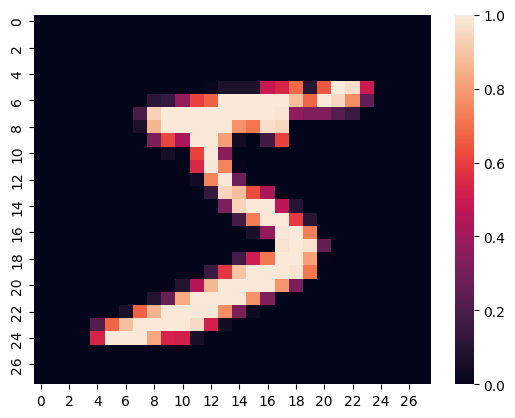

In [4]:
sns.heatmap(x_train[0])
plt.show()

In [5]:
model = Sequential([
Flatten(input_shape=(28, 28)), Dense(128, activation="relu"),
Dropout (0.2),
Dense(10)
])

In [6]:
predictions = model(x_train[ :1]).numpy()


In [7]:
predictions

array([[ 0.8664194 ,  0.4858571 , -0.7985383 , -0.1105038 , -0.07747319,
         0.29265708,  0.81413245, -0.6409693 ,  0.47413528, -0.23772989]],
      dtype=float32)

In [8]:
tf.nn.softmax (predictions).numpy()

array([[0.18590112, 0.12705913, 0.03517224, 0.06998575, 0.07233603,
        0.10473702, 0.17643067, 0.0411748 , 0.12557848, 0.06162488]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
model.compile(optimizer="adam" , loss = loss_fn, metrics=["accuracy"])

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2942 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1414 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1051 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0878 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0755 - accuracy: 0.9761


In [12]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.0747 - accuracy: 0.9777 - 605ms/epoch - 2ms/step


[0.07466129958629608, 0.9776999950408936]

In [13]:
## VALIDATING MODEL

In [14]:
val = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0524 - accuracy: 0.9836 - val_loss: 0.0674 - val_accuracy: 0.9799
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0472 - accuracy: 0.9852 - val_loss: 0.0660 - val_accuracy: 0.9800
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0438 - accuracy: 0.9866 - val_loss: 0.0665 - val_accuracy: 0.9790
Epoch 4/5
469/469 [==============================] - 4s 7ms/step - loss: 0.0423 - accuracy: 0.9868 - val_loss: 0.0650 - val_accuracy: 0.9806
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0389 - accuracy: 0.9878 - val_loss: 0.0687 - val_accuracy: 0.9803


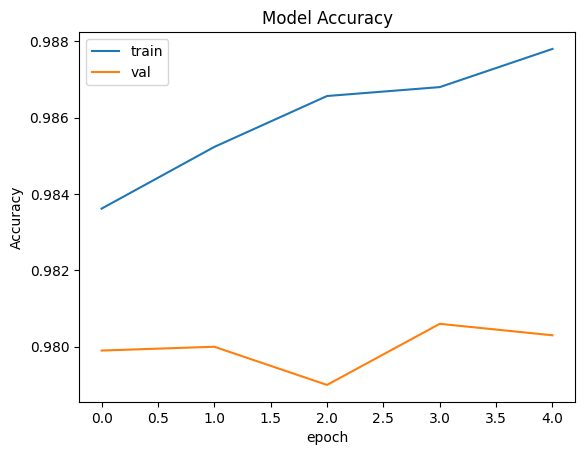

In [15]:
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.plot(val.history["accuracy"])
plt.plot (val.history [ "val_accuracy"])
plt.legend(["train", "val"])
plt.show()